# Import

In [1]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install vectorbt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_ta as ta
import vectorbt as vbt
import yfinance as yf
from datetime import datetime
from scipy import stats
from scipy import stats

from sklearn.model_selection import (GridSearchCV, 
                                     TimeSeriesSplit,
                                     train_test_split)
from sklearn.preprocessing import (OrdinalEncoder, 
                                   OneHotEncoder)
from sklearn.linear_model import (LinearRegression, 
                                  RidgeCV, 
                                  LassoCV, 
                                  ElasticNetCV)
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error, 
                             mean_absolute_percentage_error)

import warnings
warnings.filterwarnings('ignore')

# Prepare Data

In [5]:
start_date = datetime(2023,1,1)
end_date = datetime(2023,2,10)

In [6]:
%%time
data = pd.DataFrame()
data = data.ta.ticker('spy',start = start_date, end = end_date,interval = '5m')

Wall time: 4.43 s


In [7]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0
...,...,...,...,...,...,...,...
2023-02-09 15:35:00-05:00,406.040009,406.809998,405.809998,406.799988,1551788,0,0
2023-02-09 15:40:00-05:00,406.799988,407.170013,406.540009,407.119995,1462716,0,0
2023-02-09 15:45:00-05:00,407.119995,407.549988,406.799988,407.000000,2273052,0,0


In [8]:
data.ta.macd(fast=12, slow=21, signal=9,append=True)

,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9
Datetime,,,
2023-01-03 09:30:00-05:00,NaN,NaN,NaN
2023-01-03 09:35:00-05:00,NaN,NaN,NaN
2023-01-03 09:40:00-05:00,NaN,NaN,NaN
2023-01-03 09:45:00-05:00,NaN,NaN,NaN
2023-01-03 09:50:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-02-09 15:35:00-05:00,-0.557726,-0.084563,-0.473163
2023-02-09 15:40:00-05:00,-0.526630,-0.042773,-0.483857
2023-02-09 15:45:00-05:00,-0.502897,-0.015232,-0.487665


In [9]:
window = 21
target_column = 'MACDh_12_21_9'
roll = data[target_column].rolling(window)
data['z-score-MACDh'] = (data[target_column] - roll.mean()) / roll.std()
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh
Datetime,,,,,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 15:35:00-05:00,406.040009,406.809998,405.809998,406.799988,1551788,0,0,-0.557726,-0.084563,-0.473163,-1.635637
2023-02-09 15:40:00-05:00,406.799988,407.170013,406.540009,407.119995,1462716,0,0,-0.526630,-0.042773,-0.483857,-0.466368
2023-02-09 15:45:00-05:00,407.119995,407.549988,406.799988,407.000000,2273052,0,0,-0.502897,-0.015232,-0.487665,0.310375


In [20]:
data['return_5d'] = data['Close'].pct_change(5).shift(-5)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,return_5d
Datetime,,,,,,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0,NaN,NaN,NaN,NaN,-0.007282
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0,NaN,NaN,NaN,NaN,-0.008485
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0,NaN,NaN,NaN,NaN,-0.008604
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0,NaN,NaN,NaN,NaN,-0.006089
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0,NaN,NaN,NaN,NaN,-0.006649


In [22]:
data['signal'] = data.MACD_12_21_9 > data.MACDs_12_21_9
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,return_5d,signal
Datetime,,,,,,,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0,NaN,NaN,NaN,NaN,-0.007282,False
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0,NaN,NaN,NaN,NaN,-0.008485,False
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0,NaN,NaN,NaN,NaN,-0.008604,False
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0,NaN,NaN,NaN,NaN,-0.006089,False
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0,NaN,NaN,NaN,NaN,-0.006649,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 15:35:00-05:00,406.040009,406.809998,405.809998,406.799988,1551788,0,0,-0.557726,-0.084563,-0.473163,-1.635637,NaN,False
2023-02-09 15:40:00-05:00,406.799988,407.170013,406.540009,407.119995,1462716,0,0,-0.526630,-0.042773,-0.483857,-0.466368,NaN,False
2023-02-09 15:45:00-05:00,407.119995,407.549988,406.799988,407.000000,2273052,0,0,-0.502897,-0.015232,-0.487665,0.310375,NaN,False


In [23]:
data['return_5d'] = data['return_5d'].shift(-1)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,return_5d,signal
Datetime,,,,,,,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0,NaN,NaN,NaN,NaN,-0.008485,False
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0,NaN,NaN,NaN,NaN,-0.008604,False
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0,NaN,NaN,NaN,NaN,-0.006089,False
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0,NaN,NaN,NaN,NaN,-0.006649,False
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0,NaN,NaN,NaN,NaN,-0.002352,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 15:35:00-05:00,406.040009,406.809998,405.809998,406.799988,1551788,0,0,-0.557726,-0.084563,-0.473163,-1.635637,NaN,False
2023-02-09 15:40:00-05:00,406.799988,407.170013,406.540009,407.119995,1462716,0,0,-0.526630,-0.042773,-0.483857,-0.466368,NaN,False
2023-02-09 15:45:00-05:00,407.119995,407.549988,406.799988,407.000000,2273052,0,0,-0.502897,-0.015232,-0.487665,0.310375,NaN,False


In [24]:
data = data.dropna()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,return_5d,signal
Datetime,,,,,,,,,,,,,
2023-01-03 13:30:00-05:00,379.519989,379.609985,379.179993,379.209991,392933,0,0,-0.223269,0.137801,-0.361070,1.160757,0.001082,True
2023-01-03 13:35:00-05:00,379.230011,379.619995,379.079987,379.159912,376260,0,0,-0.186774,0.139437,-0.326211,1.095096,0.000777,True
2023-01-03 13:40:00-05:00,379.154999,379.749115,379.130005,379.355408,617556,0,0,-0.143784,0.145942,-0.289726,1.155702,0.000009,True
2023-01-03 13:45:00-05:00,379.353607,379.356506,378.959991,379.306488,388792,0,0,-0.111783,0.142354,-0.254137,0.961196,-0.001303,True
2023-01-03 13:50:00-05:00,379.309998,379.929993,379.130005,379.760010,388273,0,0,-0.057060,0.157662,-0.214721,1.256513,-0.002317,True


In [25]:
# Create boolean signals (TS_Entries, TS_Exits) for vectorbt
signal_vectorbt = data.ta.tsignals(data.signal, asbool = True, append = True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits
Datetime,,,,,,,,,,,,,,,,,
2023-01-03 13:30:00-05:00,379.519989,379.609985,379.179993,379.209991,392933,0,0,-0.223269,0.137801,-0.361070,1.160757,0.001082,True,True,0,False,False
2023-01-03 13:35:00-05:00,379.230011,379.619995,379.079987,379.159912,376260,0,0,-0.186774,0.139437,-0.326211,1.095096,0.000777,True,True,0,False,False
2023-01-03 13:40:00-05:00,379.154999,379.749115,379.130005,379.355408,617556,0,0,-0.143784,0.145942,-0.289726,1.155702,0.000009,True,True,0,False,False
2023-01-03 13:45:00-05:00,379.353607,379.356506,378.959991,379.306488,388792,0,0,-0.111783,0.142354,-0.254137,0.961196,-0.001303,True,True,0,False,False
2023-01-03 13:50:00-05:00,379.309998,379.929993,379.130005,379.760010,388273,0,0,-0.057060,0.157662,-0.214721,1.256513,-0.002317,True,True,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 15:05:00-05:00,407.540009,408.079987,407.385010,408.029999,1037003,0,0,-0.385098,-0.006027,-0.379071,-0.268502,-0.001914,False,False,0,False,False
2023-02-09 15:10:00-05:00,408.024994,408.075012,407.510010,407.579987,832946,0,0,-0.405597,-0.021220,-0.384376,-0.798351,-0.000614,False,False,0,False,False
2023-02-09 15:15:00-05:00,407.559998,407.579987,407.200012,407.370087,1180493,0,0,-0.428903,-0.035621,-0.393282,-1.216117,-0.000123,False,False,0,False,False


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2052 entries, 2023-01-03 13:30:00-05:00 to 2023-02-09 15:25:00-05:00
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2052 non-null   float64
 1   High           2052 non-null   float64
 2   Low            2052 non-null   float64
 3   Close          2052 non-null   float64
 4   Volume         2052 non-null   int64  
 5   Dividends      2052 non-null   int64  
 6   Stock Splits   2052 non-null   int64  
 7   MACD_12_21_9   2052 non-null   float64
 8   MACDh_12_21_9  2052 non-null   float64
 9   MACDs_12_21_9  2052 non-null   float64
 10  z-score-MACDh  2052 non-null   float64
 11  return_5d      2052 non-null   float64
 12  signal         2052 non-null   bool   
 13  TS_Trends      2052 non-null   bool   
 14  TS_Trades      2052 non-null   int32  
 15  TS_Entries     2052 non-null   bool   
 16  TS_Exits       2052 non-null   bool   
dtypes: b

In [28]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,return_5d,TS_Trades
count,2052.000000,2052.000000,2052.000000,2052.000000,2.052000e+03,2052.0,2052.0,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000
mean,398.992804,399.296936,398.697344,399.008323,9.104898e+05,0.0,0.0,0.064630,-0.000057,0.064687,-0.028497,0.000175,-0.000487
std,9.832781,9.836236,9.825611,9.833669,1.032172e+06,0.0,0.0,0.367795,0.107970,0.347343,1.285394,0.002570,0.292103
min,378.329987,378.500000,378.089996,378.334991,0.000000e+00,0.0,0.0,-1.086916,-0.471290,-0.982304,-3.520596,-0.014267,-1.000000
25%,392.043739,392.213753,391.799988,392.058678,4.777945e+05,0.0,0.0,-0.159565,-0.053082,-0.159090,-1.029567,-0.001133,0.000000
50%,399.014999,399.414993,398.679993,399.069992,7.004895e+05,0.0,0.0,0.098070,0.004654,0.095001,-0.010586,0.000221,0.000000
75%,406.292496,406.532501,406.015007,406.338745,1.004967e+06,0.0,0.0,0.252831,0.063408,0.248306,0.980709,0.001421,0.000000
max,418.059998,418.309998,417.549988,418.054993,2.980646e+07,0.0,0.0,1.379607,0.483686,1.241123,3.585677,0.013903,1.000000


<AxesSubplot:>

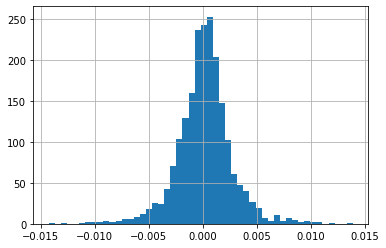

In [29]:
data['return_5d'].hist(bins = 50)

In [44]:
data['Warning Signal'] = np.where(data['return_5d']<-0.002, 'Warning', 'No Warning')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,Warning Signal
Datetime,,,,,,,,,,,,,,,,,,
2023-01-03 13:30:00-05:00,379.519989,379.609985,379.179993,379.209991,392933,0,0,-0.223269,0.137801,-0.361070,1.160757,0.001082,True,True,0,False,False,No Warning
2023-01-03 13:35:00-05:00,379.230011,379.619995,379.079987,379.159912,376260,0,0,-0.186774,0.139437,-0.326211,1.095096,0.000777,True,True,0,False,False,No Warning
2023-01-03 13:40:00-05:00,379.154999,379.749115,379.130005,379.355408,617556,0,0,-0.143784,0.145942,-0.289726,1.155702,0.000009,True,True,0,False,False,No Warning
2023-01-03 13:45:00-05:00,379.353607,379.356506,378.959991,379.306488,388792,0,0,-0.111783,0.142354,-0.254137,0.961196,-0.001303,True,True,0,False,False,No Warning
2023-01-03 13:50:00-05:00,379.309998,379.929993,379.130005,379.760010,388273,0,0,-0.057060,0.157662,-0.214721,1.256513,-0.002317,True,True,0,False,False,Warning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 15:05:00-05:00,407.540009,408.079987,407.385010,408.029999,1037003,0,0,-0.385098,-0.006027,-0.379071,-0.268502,-0.001914,False,False,0,False,False,No Warning
2023-02-09 15:10:00-05:00,408.024994,408.075012,407.510010,407.579987,832946,0,0,-0.405597,-0.021220,-0.384376,-0.798351,-0.000614,False,False,0,False,False,No Warning
2023-02-09 15:15:00-05:00,407.559998,407.579987,407.200012,407.370087,1180493,0,0,-0.428903,-0.035621,-0.393282,-1.216117,-0.000123,False,False,0,False,False,No Warning


In [45]:
(data['Warning Signal']=='Warning').sum()

302

In [46]:
data = data[data['TS_Trades']==1]
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,Warning Signal
Datetime,,,,,,,,,,,,,,,,,,
2023-01-03 14:45:00-05:00,379.459991,380.750000,379.369995,380.510010,1344647,0,0,0.019924,0.070191,-0.050266,-0.228161,0.001684,True,True,1,True,False,No Warning
2023-01-04 10:50:00-05:00,382.744995,382.799988,382.420013,382.660004,664382,0,0,0.276142,0.013229,0.262912,-0.016608,0.000614,True,True,1,True,False,No Warning
2023-01-04 15:00:00-05:00,383.260010,384.079987,383.168091,383.910004,760509,0,0,-0.327049,0.046027,-0.373076,2.413670,-0.002686,True,True,1,True,False,Warning
2023-01-04 15:55:00-05:00,382.670013,383.989990,382.670013,383.730011,4725443,0,0,-0.186137,0.076116,-0.262253,1.023164,-0.001432,True,True,1,True,False,No Warning
2023-01-05 10:10:00-05:00,380.820007,381.579987,380.390015,381.000000,1291172,0,0,-0.528433,0.012136,-0.540569,0.385244,0.000210,True,True,1,True,False,No Warning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 14:15:00-05:00,411.679993,412.149994,411.640015,411.950012,493234,0,0,-0.021603,0.025168,-0.046771,-0.441151,-0.002260,True,True,1,True,False,Warning
2023-02-08 15:35:00-05:00,410.529999,411.100006,410.320007,411.035004,904606,0,0,-0.173986,0.004245,-0.178232,1.114470,0.006933,True,True,1,True,False,No Warning
2023-02-09 12:10:00-05:00,411.850006,412.040009,411.799988,411.858002,429695,0,0,-0.155120,0.002914,-0.158034,2.433316,-0.004976,True,True,1,True,False,Warning


# Train Model

In [55]:
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier)

In [52]:
my_features = ['MACD_12_21_9', 'MACDs_12_21_9','z-score-MACDh','TS_Trades']
X = data[my_features]
y = data['Warning Signal']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
%%time
rf_params = {'n_estimators': [100, 200, 300, 400, 500],  
            'max_depth': np.arange(2, 25, 1),   
            'min_samples_leaf': [10,100],  
            'bootstrap': [True, False], 
            'max_features': [1, 2, 3, 4]
            }

# เนื่องจากข้อมูลแบบ time series ไม่สามารถทำ k-fold cross validation แบบปกติได้ 
# เพราะจำทำให้เกิด data leakage ได้
# จึงต้องทำการ split แบบ time series (คือให้ความสำคัญของการมาก่อนและหลังข้อมูล)
tscv = TimeSeriesSplit(n_splits = 5)
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=tscv, n_jobs=-1)
grid_result = rf_clf.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.76
Best Params:  {'bootstrap': True, 'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 10, 'n_estimators': 100}
Wall time: 12min 3s


In [57]:
# ใช้ parameter ตามที่ได้จาก create model with cv ด้านบน เพื่อมา predict y
clf = RandomForestClassifier(bootstrap=True, 
                             max_depth=2, 
                             max_features=1, 
                             min_samples_leaf=10, 
                             n_estimators=100, 
                             random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation

In [58]:
from sklearn.metrics import (mean_squared_error, 
                             r2_score, 
                             mean_absolute_error,
                             mean_absolute_percentage_error, 
                             plot_confusion_matrix, 
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score)

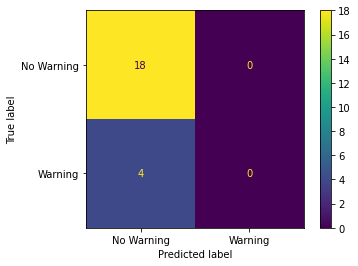

In [59]:
plot_confusion_matrix(clf, X_test, y_test)

In [60]:
accuracy_score(y_test, y_pred)

0.8181818181818182

In [61]:
precision_score(y_test, y_pred, pos_label='Warning')

0.0

In [62]:
recall_score(y_test, y_pred, pos_label='Warning')


0.0

In [63]:
f1_score(y_test, y_pred, pos_label='Warning')

0.0